In [65]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [66]:
def least_squares(y, tx):
    """calculate the least squares solution."""

    # optimal weights 
    w_ls = np.linalg.inv(tx.T.dot(tx)).dot(tx.T).dot(y)
    
    return w_ls
    raise NotImplementedError

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [67]:
from helpers import *

def test_your_least_squares():
    
    # load data
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    # optimal weights
    w_ls = least_squares(y, tx)
    
    return w_ls
    raise NotImplementedError

Test it here

In [68]:
wls = test_your_least_squares()
print(wls)

[ 73.293922    13.47971243]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [69]:
# load dataset
x, y = load_data()

# standardize dataset
x, mean_x, std_x = standardize(x)

print("shape of x: {}".format(x.shape))
print("shape of y: {}".format(y.shape))

shape of x: (50,)
shape of y: (50,)


Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [70]:
from costs import *
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    
    # define parameters
    degrees = [2,3,10,30]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        
        # apply polynomial 
        phi = build_poly(x, degree)
        
        # least square
        weights = least_squares(y, phi)
        
        # root mean squared error   
        rmse = np.sqrt(2*compute_mse(y, phi, weights))
        
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(i=ind + 1, d=degree, loss=rmse))
        
        # plot fit
        plot_fitted_curve(y, x, weights, degree, axs[ind // num_col][ind % num_col])
        
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=2, rmse=0.330206116939512
Processing 2th experiment, degree=3, rmse=0.1828456348866183
Processing 3th experiment, degree=10, rmse=0.17551506785792956
Processing 4th experiment, degree=30, rmse=0.17405173144811695


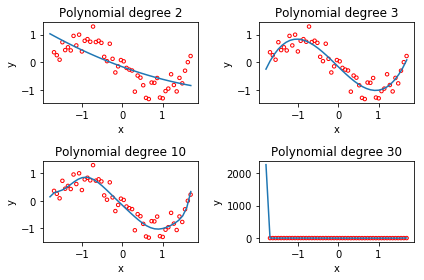

In [71]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [72]:
import random

In [73]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    
    # shuffle dataset
    #index = np.arange(len(y))
    #random.seed(seed)
    #random.shuffle(index)
    
    np.random.seed(seed)
    index = np.arange(len(x))
    np.random.shuffle(index)

    # separation index
    p = round(ratio * len(y))
    
    # training 
    x_tr = x[index[0:p]]
    y_tr = y[index[0:p]]

    # testing 
    x_te = x[index[p:]]
    y_te = y[index[p:]]
    
    return x_tr, y_tr, x_te, y_te
    
    raise NotImplementedError

Then, test your `split_data` function below.

In [74]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    #split the dataset into train and test datasets
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed=1);
    
    # polynomial basic functions
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
        
    # least square weights
    w_tr = least_squares(y_tr, phi_tr)
        
    # root mean squared error   
    rmse_tr = np.sqrt(compute_mse(y_tr, phi_tr, w_tr))
    rmse_te = np.sqrt(compute_mse(y_te, phi_te, w_tr))
        
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [75]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)
    print("--------------")

proportion=0.9, degree=1, Training RMSE=0.322, Testing RMSE=0.439
proportion=0.9, degree=3, Training RMSE=0.187, Testing RMSE=0.151
proportion=0.9, degree=7, Training RMSE=0.181, Testing RMSE=0.134
proportion=0.9, degree=12, Training RMSE=0.174, Testing RMSE=0.208
--------------
proportion=0.5, degree=1, Training RMSE=0.283, Testing RMSE=0.391
proportion=0.5, degree=3, Training RMSE=0.168, Testing RMSE=0.216
proportion=0.5, degree=7, Training RMSE=0.154, Testing RMSE=0.237
proportion=0.5, degree=12, Training RMSE=0.132, Testing RMSE=1.722
--------------
proportion=0.1, degree=1, Training RMSE=0.321, Testing RMSE=0.529
proportion=0.1, degree=3, Training RMSE=0.079, Testing RMSE=0.476
proportion=0.1, degree=7, Training RMSE=2.201, Testing RMSE=20.069
proportion=0.1, degree=12, Training RMSE=1.652, Testing RMSE=7.667
--------------


# 3 Ridge Regression
Please fill in the function below.

In [76]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression when the loss is the MSE."""
        
    # optimal weights 
    w_rr = np.linalg.inv(tx.T.dot(tx) + lambda_*np.identity(tx.shape[1])).dot(tx.T).dot(y)
    
    return w_rr
    raise NotImplementedError

In [77]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    
    # define parameter
    lambdas = np.logspace(-5, 0, 15)

    # split the data, and return train and test data: TODO
    x_tr, y_tr, x_te, y_te = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    phi_tr = build_poly(x_tr, degree)
    phi_te = build_poly(x_te, degree)
    
    rmse_tr = []
    rmse_te = []
    
    for ind, lambda_ in enumerate(lambdas):
        
        # ridge regression with a given lambda
        w_tr = ridge_regression(y_tr, phi_tr, lambda_)
        
        # root mean squared error   
        rmse_tr.append(np.sqrt(2*compute_mse(y_tr, phi_tr, w_tr)))
        rmse_te.append(np.sqrt(2*compute_mse(y_te, phi_te, w_tr)))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.172, Testing RMSE=0.211
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.172, Testing RMSE=0.210
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.173, Testing RMSE=0.208
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.174, Testing RMSE=0.205
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.177, Testing RMSE=0.199
proportion=0.5, degree=7, lambda=0.193, 

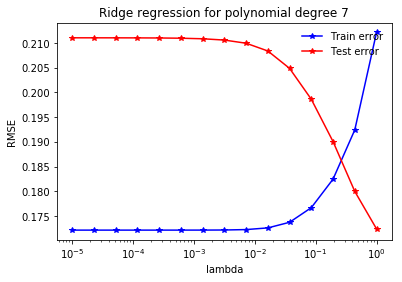

In [78]:
# ridge regresion
seed = 44
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)